<a href="https://colab.research.google.com/github/solomonalfred/-/blob/master/notebook5bb1e79997.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dmitryyemelyanov_chinese_traffic_signs_path = kagglehub.dataset_download('dmitryyemelyanov/chinese-traffic-signs')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
train_df=pd.read_csv('../input/chinese-traffic-signs/annotations.csv')

In [ ]:
train_df.head()

,file_name,width,height,x1,y1,x2,y2,category
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0


In [ ]:
classes = [3,4,5,7,11,16,17,26,30,35,43,55]

In [ ]:
filtered_df = train_df[train_df['category'].isin(classes)].copy()

In [ ]:
filtered_df['category'] = filtered_df['category'].astype(str)


In [ ]:
train_df = filtered_df

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="../input/chinese-traffic-signs/images",
    x_col="file_name",
    y_col="category",
    has_ext=False,
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64, 64)
)

val_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='../input/chinese-traffic-signs/images',
    x_col="file_name",
    y_col="category",
    has_ext=False,
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    target_size=(64, 64)
)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

num_classes = len(train_generator.class_indices)
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# callbacks = [
#     EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
#     ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
# ]

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
)

Found 2168 validated image filenames belonging to 12 classes.
Found 542 validated image filenames belonging to 12 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 0.4545 - loss: 1.8117 - val_accuracy: 0.1270 - val_loss: 3.6241
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 1.0083 - val_accuracy: 0.0000e+00 - val_loss: 3.6409
Epoch 3/20


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - accuracy: 0.7655 - loss: 0.6112 - val_accuracy: 0.1992 - val_loss: 3.9815
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1906 - val_accuracy: 0.0000e+00 - val_loss: 4.9174
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - accuracy: 0.8876 - loss: 0.3225 - val_accuracy: 0.1270 - val_loss: 4.4142
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9062 - loss: 0.3150 - val_accuracy: 0.0000e+00 - val_loss: 4.7828
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 251ms/step - accuracy: 0.9356 - loss: 0.1922 - val_accuracy: 0.4023 - val_loss: 2.2729
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9375 - loss: 0.2172 - val_accuracy: 0.1000 - val_loss: 2.9623
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.9450 - loss: 0.1555 - val_accuracy: 0.6113 - val_loss: 1.2966
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 1.0000 - loss: 0.0483 - val_accuracy: 0.

In [ ]:
loss,acc=model.evaluate(val_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9886 - loss: 0.0553


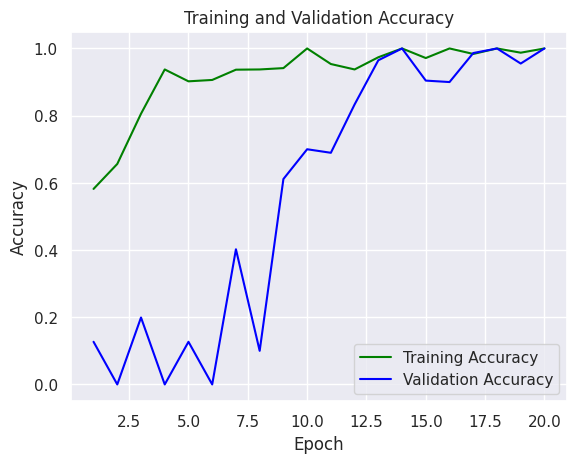

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.show()


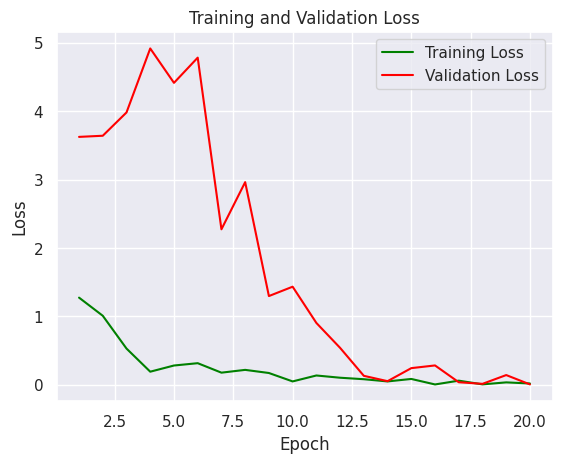

In [ ]:
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

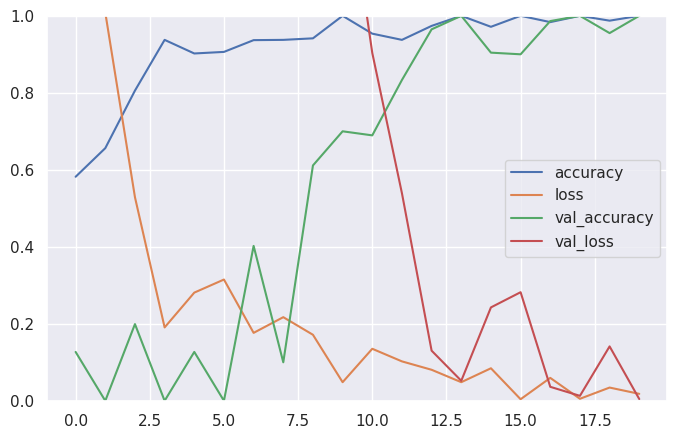

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
predictions = model.predict(val_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step


<Axes: >

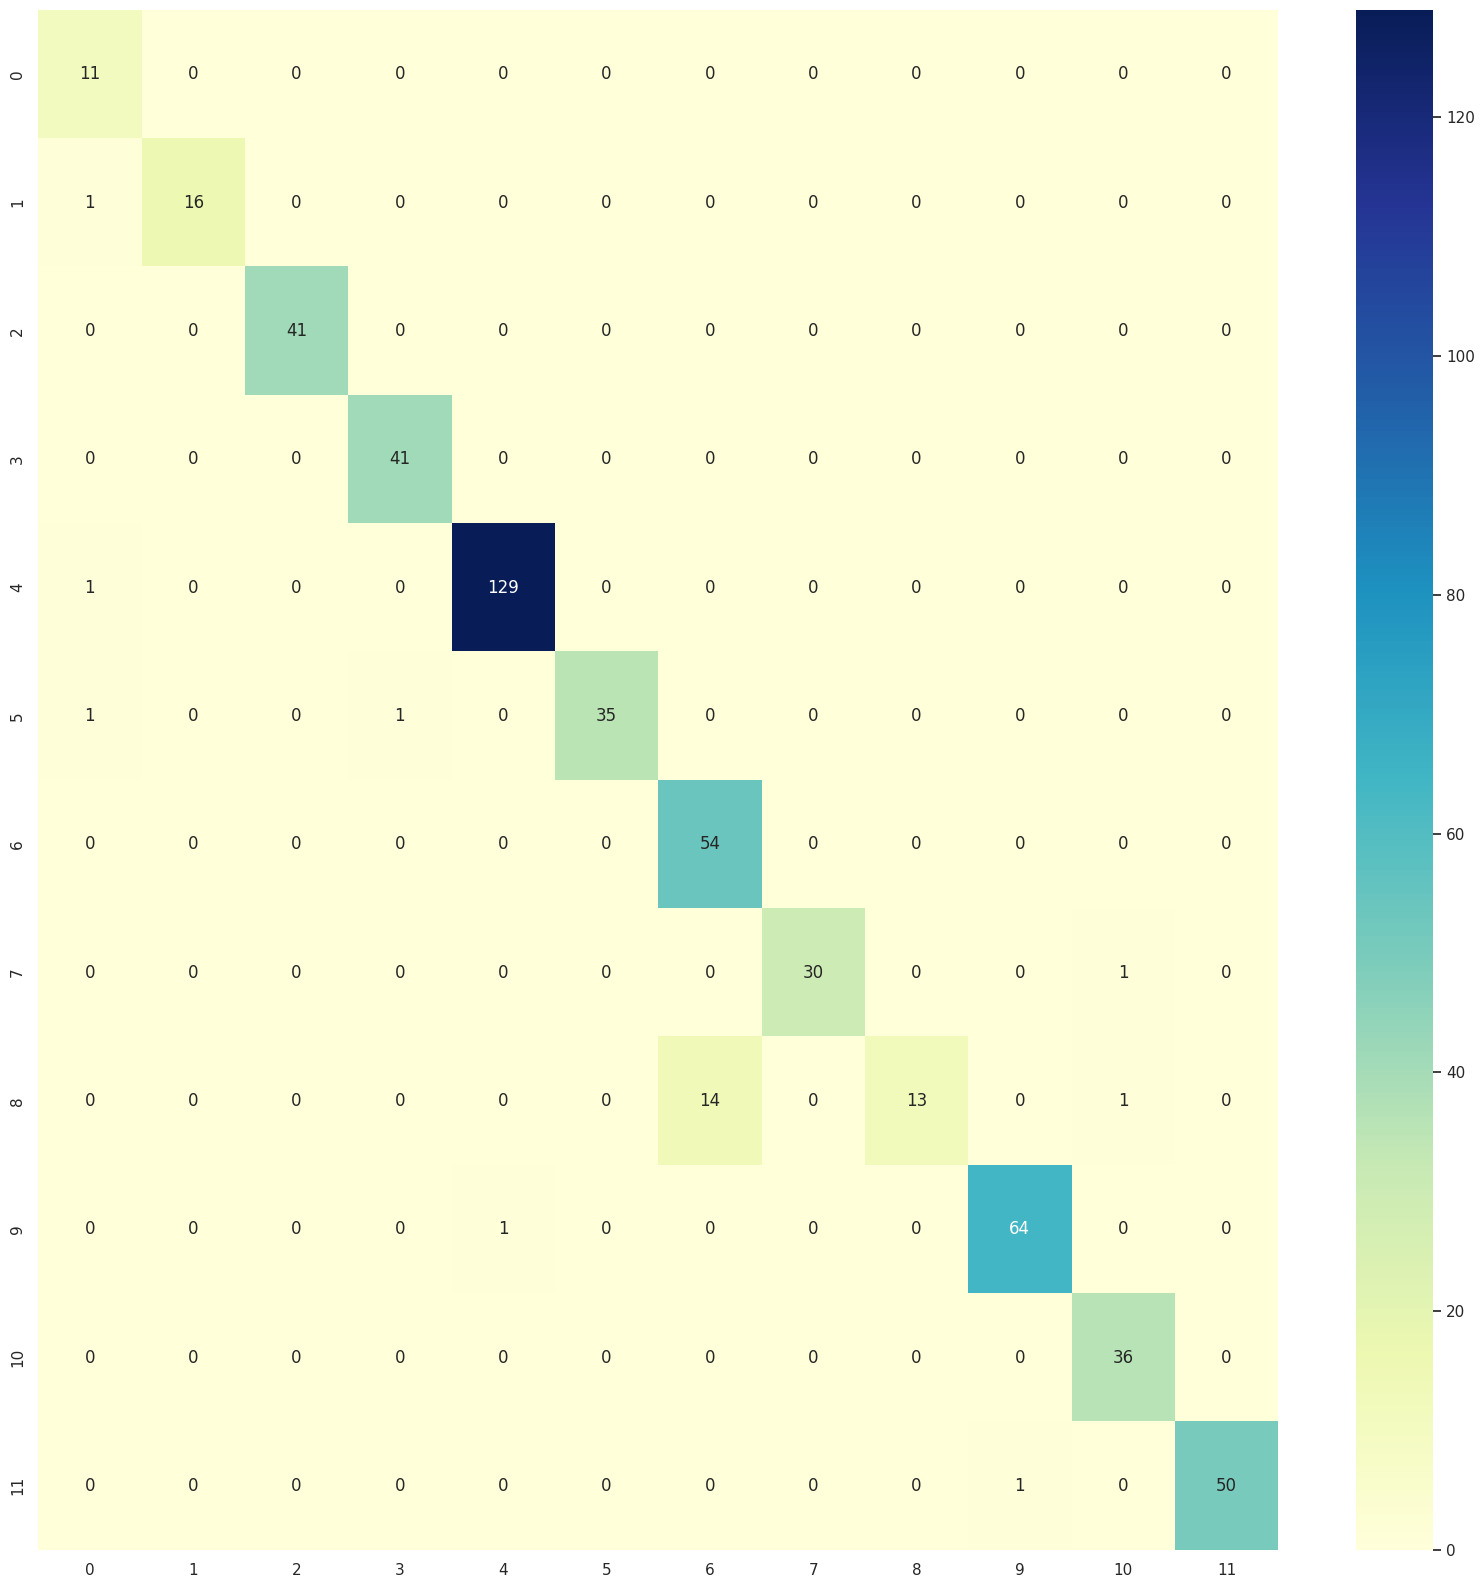

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="../input/chinese-traffic-signs/images",
    x_col="file_name",
    y_col="category",
    has_ext=False,
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64, 64)
)

val_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='../input/chinese-traffic-signs/images',
    x_col="file_name",
    y_col="category",
    has_ext=False,
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    target_size=(64, 64)
)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

num_classes = len(train_generator.class_indices)
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
)


Found 2168 validated image filenames belonging to 12 classes.
Found 542 validated image filenames belonging to 12 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.5560 - loss: 1.4624 - val_accuracy: 0.1270 - val_loss: 2.4962
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.3444 - val_accuracy: 0.0000e+00 - val_loss: 1.9296
Epoch 3/20


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.9076 - loss: 0.2713 - val_accuracy: 0.1270 - val_loss: 2.8020
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 1.0000 - loss: 0.0266 - val_accuracy: 0.0000e+00 - val_loss: 2.7185
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - accuracy: 0.9656 - loss: 0.1154 - val_accuracy: 0.2012 - val_loss: 2.9546
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 1.0000 - loss: 0.0403 - val_accuracy: 0.0000e+00 - val_loss: 3.6173
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - accuracy: 0.9656 - loss: 0.0945 - val_accuracy: 0.1328 - val_loss: 4.6944
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.0000e+00 - val_loss: 5.3229
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - accuracy: 0.9878 - loss: 0.0373 - val_accuracy: 0.4082 - val_loss: 1.5505
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accurac

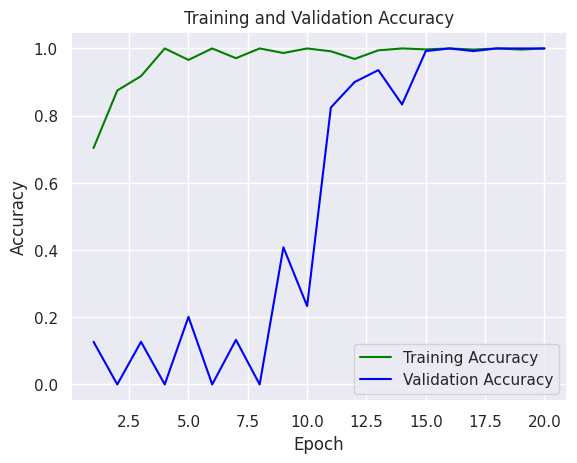

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.show()


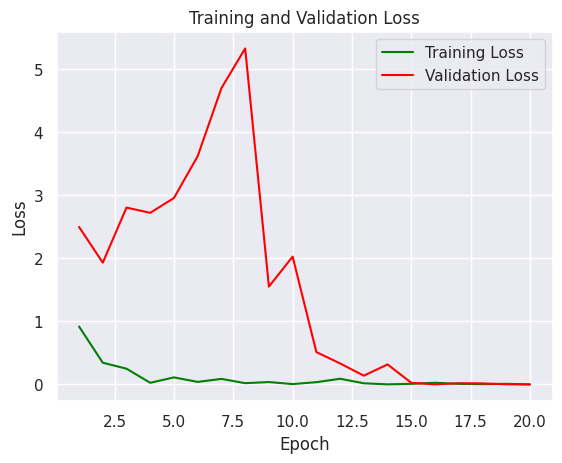

In [ ]:
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()